In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [11]:
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.
    return img


In [19]:
def visualize_intermediate_layers(model, layer_names, image_path):
    image = preprocess_image(image_path, target_size=(256, 256))

    # Selecciona solo las capas de convolución
    conv_layers = [layer for layer in model.layers if 'conv' in layer.name]

    # Crea modelos intermedios para cada capa de convolución
    intermediate_models = [Model(inputs=model.inputs, outputs=layer.output) for layer in conv_layers]

    # Obtén las activaciones para la imagen de entrada
    activations = [model.predict(image) for model in intermediate_models]

    # Visualiza las activaciones
    images_per_row = 16
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 32
                channel_image += 64
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size:(col + 1) * size, row * size:(row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()


1/1 [==============================] - 0s 95ms/step


C:\Users\074002781\AppData\Local\Temp\ipykernel_18832\218790518.py:26: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


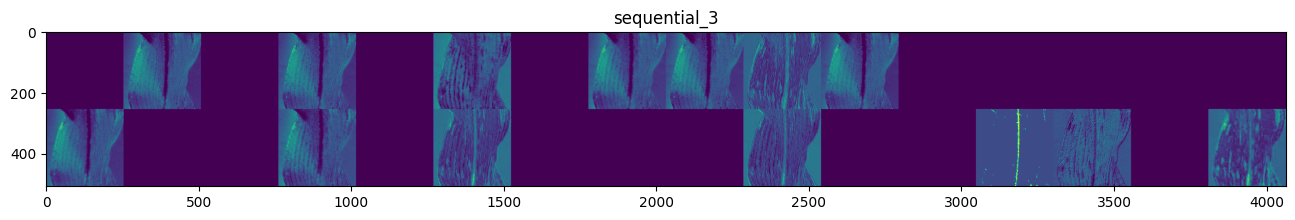

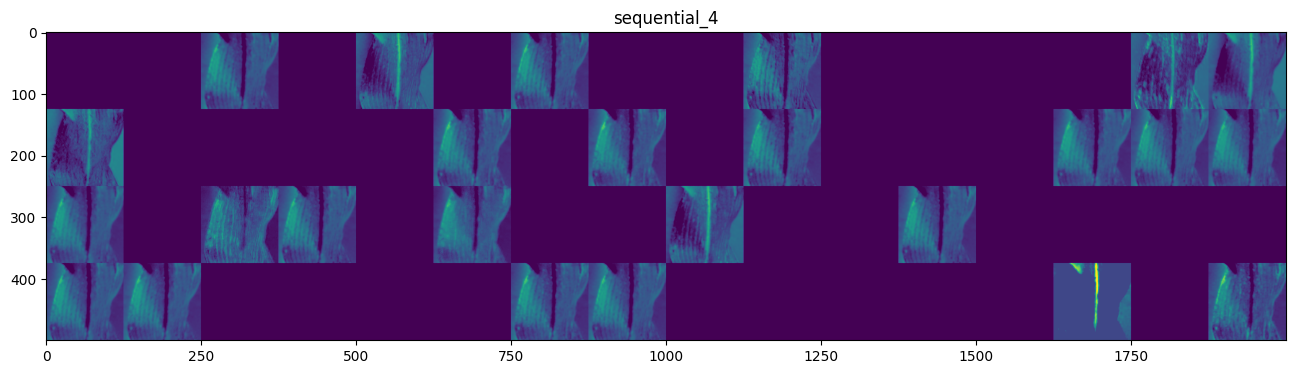

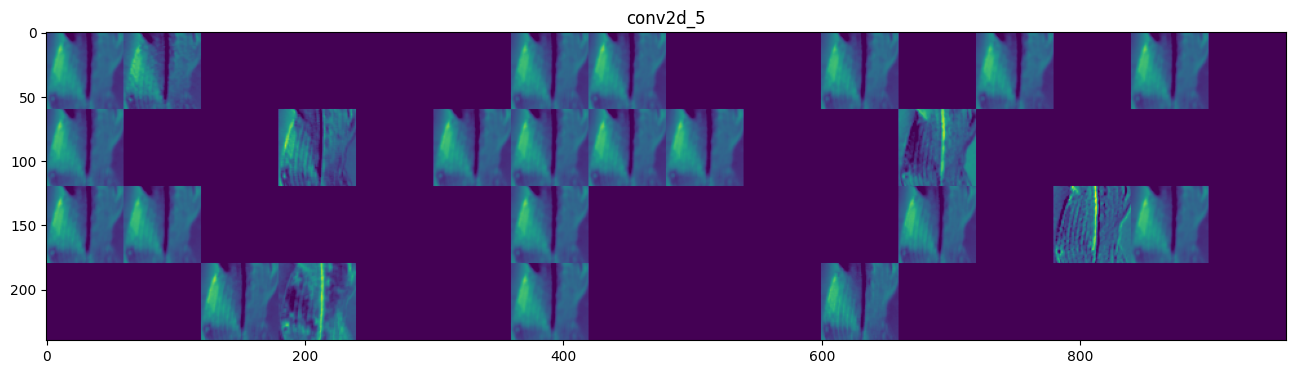

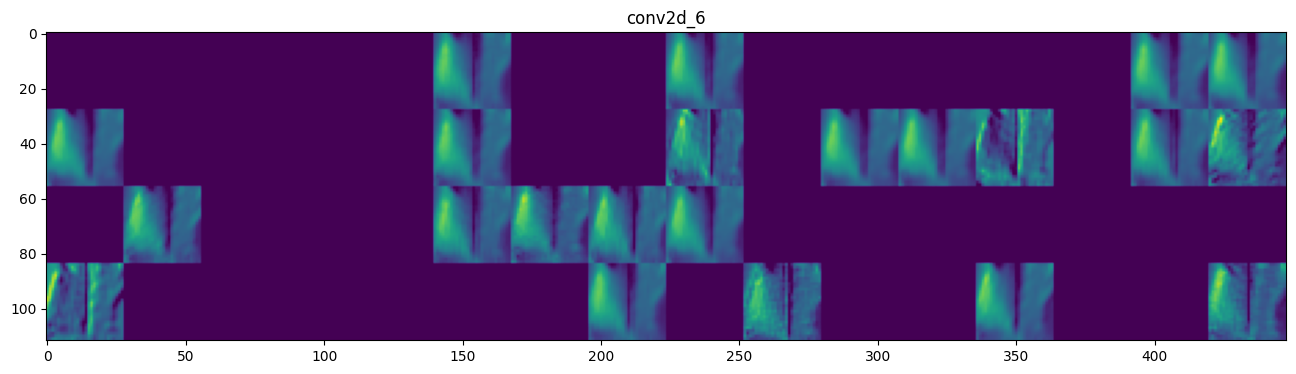

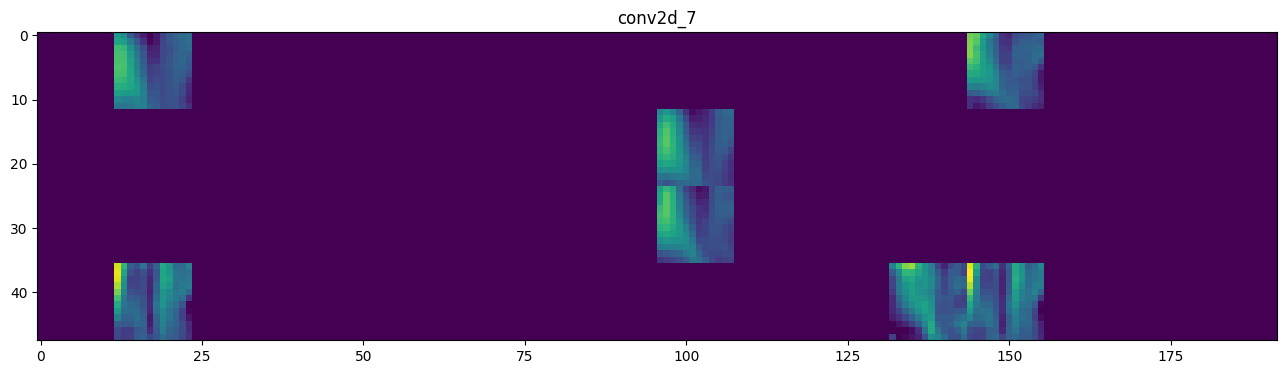

In [21]:
# Carga tu modelo entrenado
model = tf.keras.models.load_model('Proyecto final\model_1')

# Lista de nombres de las capas de convolución que deseas visualizar
layer_names = [layer.name for layer in model.layers if isinstance(layer, keras.layers.Conv2D) or isinstance(layer, keras.models.Sequential)]

# Ruta de la imagen de entrada
image_path = "archive\data\Gray_Leaf_Spot\Corn_Gray_Spot (55).JPG"

# Llama a la función para visualizar las activaciones intermedias
visualize_intermediate_layers(model, layer_names, image_path)
